In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

In [3]:
rentals_df = pd.read_csv(r'/data/notebook_files/uk_housing_rentals.csv')
rentals_df = rentals_df.drop(columns='Unnamed: 0')
rentals_df.drop_duplicates(keep='first',inplace=True,ignore_index=True)
rentals_df['Number of Rooms'] = rentals_df['Number of Rooms'].str.replace('bedrooms','',regex=False)
rentals_df['Number of Rooms'] = rentals_df['Number of Rooms'].str.replace('bedroom','',regex=False)
rentals_df['Number of Rooms'] = rentals_df['Number of Rooms'].str.replace('bedroom','',regex=False)
rentals_df['Number of Rooms'] = rentals_df['Number of Rooms'].str.replace('10','1',regex=False)
rentals_df['Price'] = rentals_df['Price'].str.replace('£','',regex=False)
rentals_df['Price'] = rentals_df['Price'].str.replace(',','',regex=False)
rentals_df = rentals_df.rename(columns={'Number of Rooms':'Number of Bedrooms'})
rentals_df.drop(rentals_df.loc[rentals_df['Number of Bedrooms']=='Not Specified'].index, inplace=True)
rentals_df.drop(rentals_df.loc[rentals_df['Number of Bedrooms']=='34 sq.foot'].index, inplace=True)
rentals_df.drop(rentals_df.loc[rentals_df['Number of Bedrooms']=='24 sq.foot'].index, inplace=True)
rentals_df.drop(rentals_df.loc[rentals_df['Number of Bedrooms']=='27 sq.foot'].index, inplace=True)

In [4]:
rentals_df

,Description,Location,Number of Bedrooms,Price
0,1 Bedroom Flat For Rent,"Birmingham, West Midla...",1,625 ...
1,"4B Paddington Basin, London, W2","London, Greater London...",3,6000 ...
2,2 Bedroom Terraced House to Rent in Albert Roa...,"London, Greater London...",2,1400 ...
3,"1 Bedroom Apartment to Rent in Hill Street, Ma...","London, Greater London...",1,2817 ...
4,"2 Bedroom Flat to Rent in Greystoke Court, Eal...","London, Greater London...",2,1525 ...
...,...,...,...,...
2059,"2 Bedroom Flat to Rent in Leander Road, Brixto...","London, Greater London...",2,1885 ...
2060,"2 Bedroom Maisonette to Rent in Runnymede, Col...","London, Greater London...",2,1700 ...
2061,"1 Bedroom Flat to Rent in Upper Street, London...","London, Greater London...",1,1625 ...
2062,"apartment in Guilford Street, London United Ki...","London, Greater London...",1,3100 ...


In [5]:
rentals_df.describe()

,Description,Location,Number of Bedrooms,Price
count,1993,1993,1993,1993
unique,1599,6,7,735
top,apartment for rent in London,"London, Greater London...",2,1950 ...
freq,120,1980,769,31


In [6]:
rentals_df['Location'].value_counts()

London, Greater London 1980
 Birmingham, West Midlands 5
 Harrow, Harrow 4
 Liverpool, Merseyside 2
 Leeds, Leeds 1
 Bromley, Bromley 1
Name: Location, dtype: int64

In [7]:
rentals_df_london = rentals_df[rentals_df['Location'].str.contains('London, Greater London')]

In [8]:
rentals_df_london['Number of Bedrooms'].unique()

array(['3 ', '2 ', '1 ', '4 ', '5 ', '6 ', '7 '], dtype=object)

In [9]:
one_bed = rentals_df_london[rentals_df_london['Number of Bedrooms'].astype(int) == 1]

one_bed['Price'].astype(int).describe()

count 745.000000
mean 2061.132886
std 1710.835705
min 312.000000
25% 1303.000000
50% 1733.000000
75% 2300.000000
max 29996.000000
Name: Price, dtype: float64

In [10]:
one_bed['Price'].astype(int).max()

29996

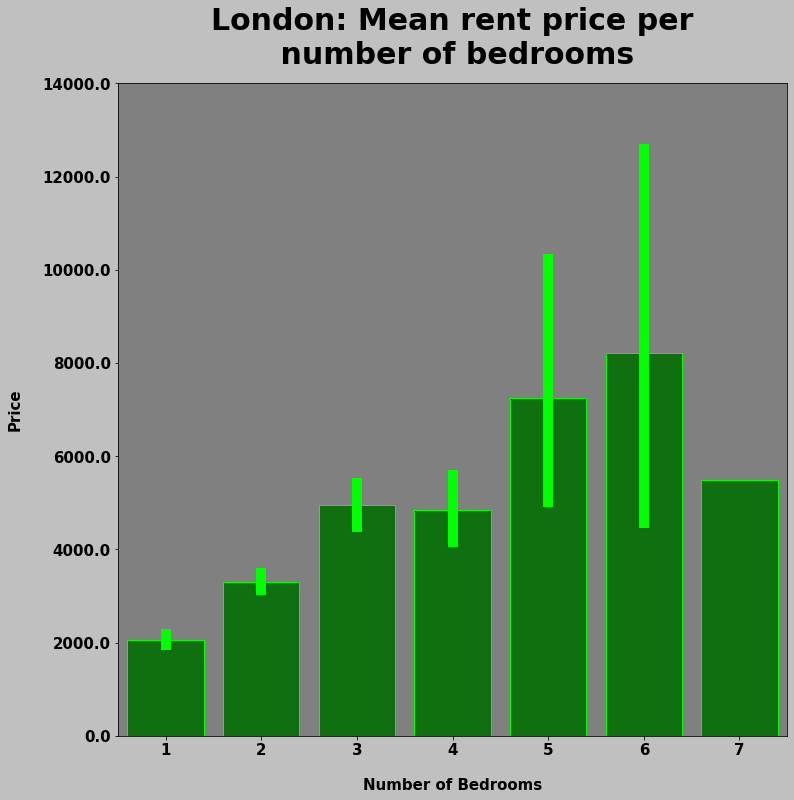

In [11]:
bedrooms = rentals_df_london['Number of Bedrooms'].astype(int)
price = rentals_df_london['Price'].astype(int)


figure(num=0,figsize=(12,12),facecolor='silver')
ax = sns.barplot(x=bedrooms,y=price,color='green',edgecolor='lime',errcolor='lime',errwidth=10)
ax.set_facecolor('grey')
sns.set_style("whitegrid", {"axes.facecolor": ".1"})
ax.set_title('London: Mean rent price per\n number of bedrooms',fontdict={'fontsize':30,'fontweight':'bold'},pad=20)
ax.set_yticks(ax.get_yticks())
ax.set_yticklabels(ax.get_yticks(),fontdict={'fontsize':15,'fontweight':'bold'})
ax.set_xticklabels(ax.get_xticks()+1,fontdict={'fontsize':15,'fontweight':'bold'})
ax.set_ylabel('Price',fontdict={'fontsize':15,'fontweight':'bold'},labelpad=20)
ax.set_xlabel('Number of Bedrooms',fontdict={'fontsize':15,'fontweight':'bold'},labelpad=20)

plt.show()

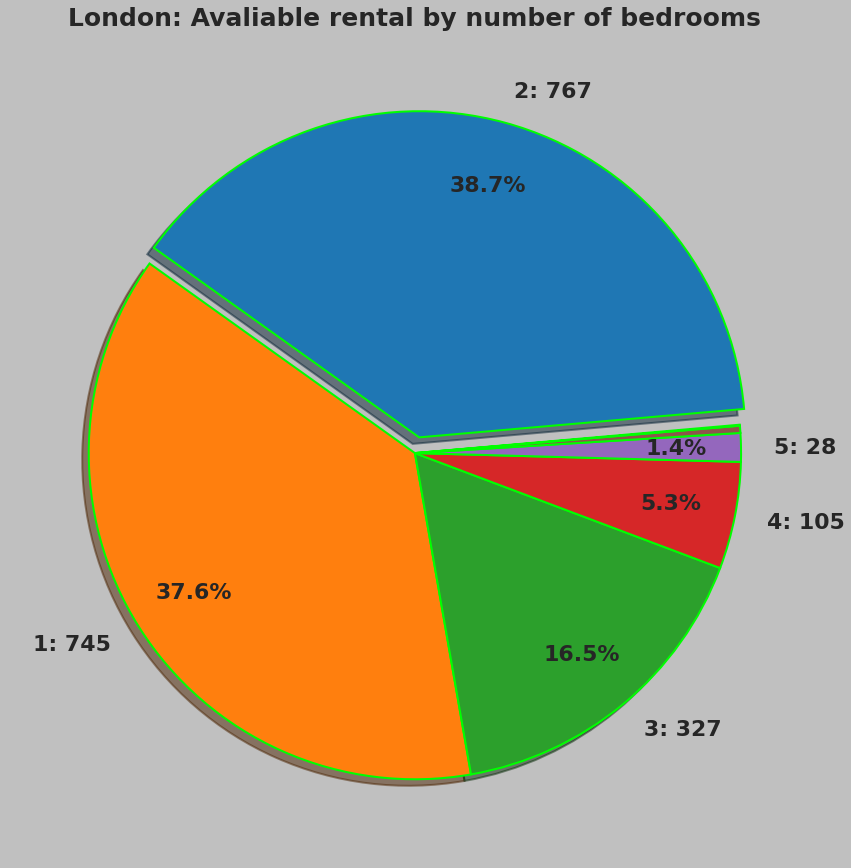

In [124]:
data = rentals_df_london['Number of Bedrooms'].value_counts()

# Hidding PCTs and labels for values below 1%

index = [label for label in data.index.astype(int)]
data_list = list(data)
label = [str(label) + ": " + str(value) if value >= 8 else '' for label, value in zip(index,data_list)]
autopct = lambda pct: f"{pct:.1f}%" if pct > 1 else ""



explode = (0.05,0.0,0.0,0.0,0.0,0.0,0.0)

figure(figsize=(15,15),facecolor='silver')
ax = plt.pie(data,labels=label,startangle=5,shadow=True,explode=explode,autopct=autopct,
             pctdistance=0.8, labeldistance=1.1,
             textprops={'fontsize':22,'fontweight':'bold'},
             wedgeprops={"edgecolor":"lime",'linewidth': 2, 'linestyle': 'solid', 'antialiased': True})
        
plt.title("London: Avaliable rental by number of bedrooms",fontdict={'fontsize':25,'fontweight':'bold'},pad=20)

plt.show()

In [42]:
data

2 767
1 745
3 327
4 105
5 28
6 7
7 1
Name: Number of Bedrooms, dtype: int64